# Random Forest

## Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

import glob
import os
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Data Import

In [3]:
# def add_cols(path, cols):
#     with open(path,"r") as f:  
#         oline=f.readlines() 
#         oline.insert(0,cols) 
#         f.close() 

#     with open(path,"w") as f:
#         f.writelines(oline) 
#         f.close() 

In [4]:
with open("./Bot_Iot_Data_File/Final_Entire_Dataset/UNSW_2018_IoT_Botnet_Dataset_Feature_Names.csv","r") as f:
    cols = f.read()
    f.close()

# for i in range(1,75):
#     path = f"./Bot_Iot_Data_File/Final_Entire_Dataset/UNSW_2018_IoT_Botnet_Dataset_{i}.csv"
#     add_cols(path, cols)

In [5]:
files = os.path.join("./Bot_Iot_Data_File/Final_Entire_Dataset/", "UNSW_2018_IoT_Botnet_Dataset_?.csv")
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)

Resultant CSV after joining all CSV files at a particular location...


## 결측치 제거

In [6]:
isnull_cols = ['smac', 'dmac', 'soui', 'doui', 'sco', 'dco']
data = data.drop(columns = isnull_cols)

## 수치형 데이터, 범주형 데이터 확인

In [7]:
for c in data.columns:
    print(f"{c} : {len(data[c].unique())} ({data[c].dtype})")

pkSeqID : 9000000 (int64)
stime : 8179361 (float64)
flgs : 13 (object)
proto : 7 (object)
saddr : 25 (object)
sport : 100448 (object)
daddr : 290 (object)
dport : 115950 (object)
pkts : 650 (int64)
bytes : 4664 (int64)
state : 13 (object)
ltime : 7652811 (float64)
seq : 458270 (int64)
dur : 1430477 (float64)
mean : 383355 (float64)
stddev : 307127 (float64)
sum : 783222 (float64)
min : 201259 (float64)
max : 478478 (float64)
spkts : 540 (int64)
dpkts : 267 (int64)
sbytes : 3139 (int64)
dbytes : 1620 (int64)
rate : 307190 (float64)
srate : 175722 (float64)
drate : 86060 (float64)
attack : 2 (int64)
category : 4 (object)
subcategory  : 7 (object)


### 데이터셋은 인공적으로 만들어진 공격이기 때문에 실제 네트워크와 상관없는 ip, port제거
### 시간?(stime)

In [8]:
data = data.drop(columns = ['pkSeqID', 'saddr', 'sport', 'daddr', 'dport'])

## Feature와 Target 설정

In [9]:
# best_cols = ['seq', 'stddev', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP', 'drate', 'srate', 'max']
# target_col = ['category']

In [10]:
# data = data[best_cols + target_col]

In [11]:
# data.head(5)

In [12]:
# X_orig = data.drop(columns = target_col)
# y = data[target_col]
# y = np.ravel(y)
# y

In [13]:
target_col = 'category'
x = data.drop(columns = ['attack', 'category', 'subcategory '])
y = data['category']
x

,stime,flgs,proto,pkts,bytes,state,ltime,seq,dur,mean,...,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate
0,1.528082e+09,e g,tcp,9,822,RST,1.528082e+09,39416,51.364681,0.159031,...,0.477094,0.149062,0.164338,6,3,642,180,0.155749,0.097343,0.038937
1,1.528082e+09,e g,tcp,9,822,RST,1.528082e+09,39417,51.364681,0.159031,...,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937
2,1.528082e+09,e g,tcp,9,822,RST,1.528082e+09,39418,51.364681,0.159031,...,0.477092,0.149062,0.164337,6,3,642,180,0.155749,0.097343,0.038937
3,1.528082e+09,e g,tcp,9,822,RST,1.528082e+09,39419,51.404530,0.172313,...,0.516939,0.163692,0.188911,6,3,642,180,0.155628,0.097268,0.038907
4,1.528082e+09,e g,tcp,9,822,RST,1.528082e+09,39420,51.404530,0.172313,...,0.516938,0.163691,0.188912,6,3,642,180,0.155628,0.097268,0.038907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,1.528082e+09,e s,tcp,3,462,REQ,1.528082e+09,91424,42.664722,0.000000,...,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000
8999996,1.528082e+09,e s,tcp,3,462,REQ,1.528082e+09,91425,42.664722,0.000000,...,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000
8999997,1.528082e+09,e s,tcp,3,462,REQ,1.528082e+09,91426,42.664722,0.000000,...,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000
8999998,1.528082e+09,e s,tcp,3,462,REQ,1.528082e+09,91427,42.664722,0.000000,...,0.000000,0.000000,0.000000,3,0,462,0,0.046877,0.046877,0.000000


In [14]:
x.columns

Index(['stime', 'flgs', 'proto', 'pkts', 'bytes', 'state', 'ltime', 'seq',
       'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'srate', 'drate'],
      dtype='object')

In [15]:
y.unique()

array(['DoS', 'Normal', 'Reconnaissance', 'Theft'], dtype=object)

## 데이터 전처리 및 정규화

In [16]:
# 범주형 데이터
categorical_Feature = ['flgs', 'proto', 'state']

In [17]:
x_numerical = x.drop(columns = categorical_Feature)
x_categorical = x[categorical_Feature]

### 범주형 데이터 정규화

In [18]:
le = LabelEncoder()
for col in categorical_Feature:
    x[col] = le.fit_transform(x[col])

In [19]:
# flgs_encoding = pd.get_dummies(x['flgs'])
# proto_encoding = pd.get_dummies(x['proto'])
# state_encoding = pd.get_dummies(x['state'])
# x_categorical = pd.concat([flgs_encoding, proto_encoding, state_encoding], axis = 1)
# x_categorical

### 수치형 데이터 정규화

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
X = pd.DataFrame(x_scaled, columns=x.columns)

In [21]:
X

,stime,flgs,proto,pkts,bytes,state,ltime,seq,dur,mean,...,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate
0,0.499202,0.249550,0.035327,0.008558,-0.002475,0.61514,0.499234,-1.026884,0.775422,0.111594,...,0.001382,1.241333,-0.172211,0.005376,0.011438,-0.002862,-0.001169,-0.101865,-0.061000,-0.062870
1,0.499202,0.249550,0.035327,0.008558,-0.002475,0.61514,0.499234,-1.026873,0.775422,0.111594,...,0.001382,1.241333,-0.172212,0.005376,0.011438,-0.002862,-0.001169,-0.101865,-0.061000,-0.062870
2,0.499202,0.249550,0.035327,0.008558,-0.002475,0.61514,0.499234,-1.026862,0.775422,0.111594,...,0.001382,1.241333,-0.172212,0.005376,0.011438,-0.002862,-0.001169,-0.101865,-0.061000,-0.062870
3,0.499202,0.249550,0.035327,0.008558,-0.002475,0.61514,0.499234,-1.026851,0.776809,0.151908,...,0.005367,1.396772,-0.149056,0.005376,0.011438,-0.002862,-0.001169,-0.101865,-0.061000,-0.062870
4,0.499202,0.249550,0.035327,0.008558,-0.002475,0.61514,0.499234,-1.026839,0.776809,0.151908,...,0.005367,1.396762,-0.149055,0.005376,0.011438,-0.002862,-0.001169,-0.101865,-0.061000,-0.062870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,0.497433,0.679391,0.035327,-0.008689,-0.003144,-0.69179,0.497448,-0.447726,0.472767,-0.371110,...,-0.046340,-0.342409,-0.327065,-0.006938,-0.009140,-0.003457,-0.001621,-0.101872,-0.061033,-0.062904
8999996,0.497433,0.679391,0.035327,-0.008689,-0.003144,-0.69179,0.497448,-0.447715,0.472767,-0.371110,...,-0.046340,-0.342409,-0.327065,-0.006938,-0.009140,-0.003457,-0.001621,-0.101872,-0.061033,-0.062904
8999997,0.497433,0.679391,0.035327,-0.008689,-0.003144,-0.69179,0.497448,-0.447704,0.472767,-0.371110,...,-0.046340,-0.342409,-0.327065,-0.006938,-0.009140,-0.003457,-0.001621,-0.101872,-0.061033,-0.062904
8999998,0.497433,0.679391,0.035327,-0.008689,-0.003144,-0.69179,0.497448,-0.447692,0.472767,-0.371110,...,-0.046340,-0.342409,-0.327065,-0.006938,-0.009140,-0.003457,-0.001621,-0.101872,-0.061033,-0.062904


### Target이 범주형 데이터이므로 LabelEncoder사용

In [22]:
le = LabelEncoder()
y = le.fit_transform(y)

### Train & Test 분리

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Random Forest 학습

In [24]:
rf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=42)
rf.fit(X_train,y_train)
predict1 = rf.predict(X_test)
print(accuracy_score(y_test,predict1))

0.9998848148148148


In [25]:
data['category'].value_counts()

DoS               7169420
Reconnaissance    1821639
Normal               7354
Theft                1587
Name: category, dtype: int64

In [26]:
y_test

array([0, 0, 0, ..., 2, 2, 0])

[[2151156       0       0       0]
 [     25    1935     242       7]
 [      0      37  546110       0]
 [      0       0       0     488]]


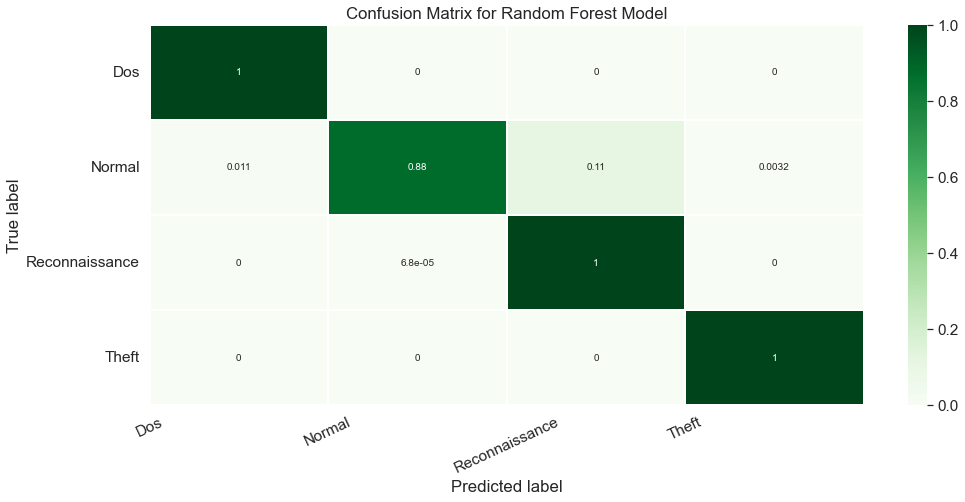

In [27]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predict1)
print(matrix)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Dos', 'Normal', 'Reconnaissance', 
               'Theft']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Feature의 중요도 

In [28]:
rf.feature_importances_

array([2.68805231e-01, 3.41437888e-02, 3.22076039e-03, 5.94977835e-04,
       1.36395135e-01, 2.93655097e-03, 1.74079912e-01, 7.34952906e-05,
       1.23988557e-01, 5.43233454e-03, 1.65056719e-05, 8.48113389e-04,
       5.72769242e-03, 5.49542255e-03, 8.39438063e-04, 8.32004666e-04,
       1.49403811e-01, 1.46380670e-04, 4.40974012e-02, 4.29086129e-02,
       1.38749931e-05])

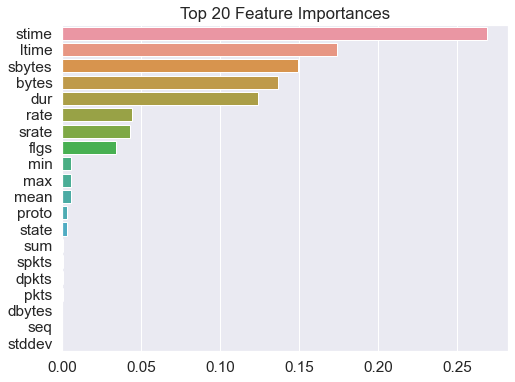

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### GridSearchCV를 통한 최적의 파라미터 계산

In [ ]:
params = { 'n_estimators' : list(range(0, 50, 10)),
           'max_depth' : list(range(0, 20, 5)),
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

### RandomizedSearchCV를 통한 최적의 파라미터 계산

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['sqrt', 'log2']
max_depth = [2,4, 6, 8]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

In [ ]:
param_score = pd.DataFrame(rf_RandomGrid.cv_results_).sort_values('rank_test_score')
param_score[param_score.rank_test_score == 1]